# **1- Data Collection**

**1.1- Importing File Formats**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing CSV file
df = pd.read_csv('/kaggle/input/nigerian-traffic-crashes-2020-2024/Nigerian_Road_Traffic_Crashes_2020_2024.csv')

**1.21- Checking Data Types**

In [2]:
data_types = df.dtypes
print(data_types)

Quarter                    object
State                      object
Total_Crashes               int64
Num_Injured                 int64
Num_Killed                  int64
Total_Vehicles_Involved     int64
SPV                         int64
DAD                         int64
PWR                         int64
FTQ                         int64
Other_Factors               int64
dtype: object


**1.22- Checking Duplicates**

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# **2- Data Exploration**

**2.1- Understanding the Structure**

**2.11- View the First Few Rows**

In [4]:
df.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


**2.12- View DataFrame Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


**2.13- Summary Statistics**

In [6]:
df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


**2.14- View Column Names**

In [7]:
print(df.columns)

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')


**2.15- Shape of the Data**

In [8]:
print(df.shape)

(518, 11)


**2.16- View a Desired Sample of 5 Rows**

In [9]:
print(df.sample(5))

     Quarter    State  Total_Crashes  Num_Injured  Num_Killed  \
225  Q2 2022  Anambra             29           45          18   
322  Q4 2022    Niger            145          553          96   
407  Q3 2023     Abia             15           42          11   
65   Q1 2021     Ondo            115          290          43   
340  Q1 2023    Borno             26           76           9   

     Total_Vehicles_Involved  SPV  DAD  PWR  FTQ  Other_Factors  
225                       30    0    0    0    7             23  
322                      195   90    2    0    7             96  
407                       18    5    0    0    0             13  
65                       152   96    0    0    2             54  
340                       26    6    0    0    0             20  


**2.2- Missing Values**

**2.21- Identifying Missing Values**

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Quarter                    0
State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
dtype: int64


**2.22- Dropping Rows or Columns with Missing Values**

In [11]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

# **3- Data Cleaning**

**3.1- Identifying Outliers using Z-Score**

In [12]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(df_outliers)

     Quarter     State  Total_Crashes  Num_Injured  Num_Killed  \
14   Q4 2020       FCT            312          572          90   
18   Q4 2020    Kaduna            281         1010         224   
19   Q4 2020      Kano            102          499         194   
27   Q4 2020      Ogun            279          548          83   
31   Q4 2020   Plateau             45          123          17   
51   Q1 2021       FCT            278          518          56   
55   Q1 2021    Kaduna            256         1149         196   
64   Q1 2021      Ogun            299          670          82   
88   Q2 2021       FCT            252          483          37   
92   Q2 2021    Kaduna            222          837         217   
97   Q2 2021     Kwara            108          368          80   
99   Q2 2021  Nasarawa            242          600          53   
101  Q2 2021      Ogun            337          637         121   
102  Q2 2021      Ondo            114          299          47   
125  Q3 20

**3.2- Remove Outliers**

In [13]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **An in depth Crash Analysis**

**Visualizing Total Crashes by State**

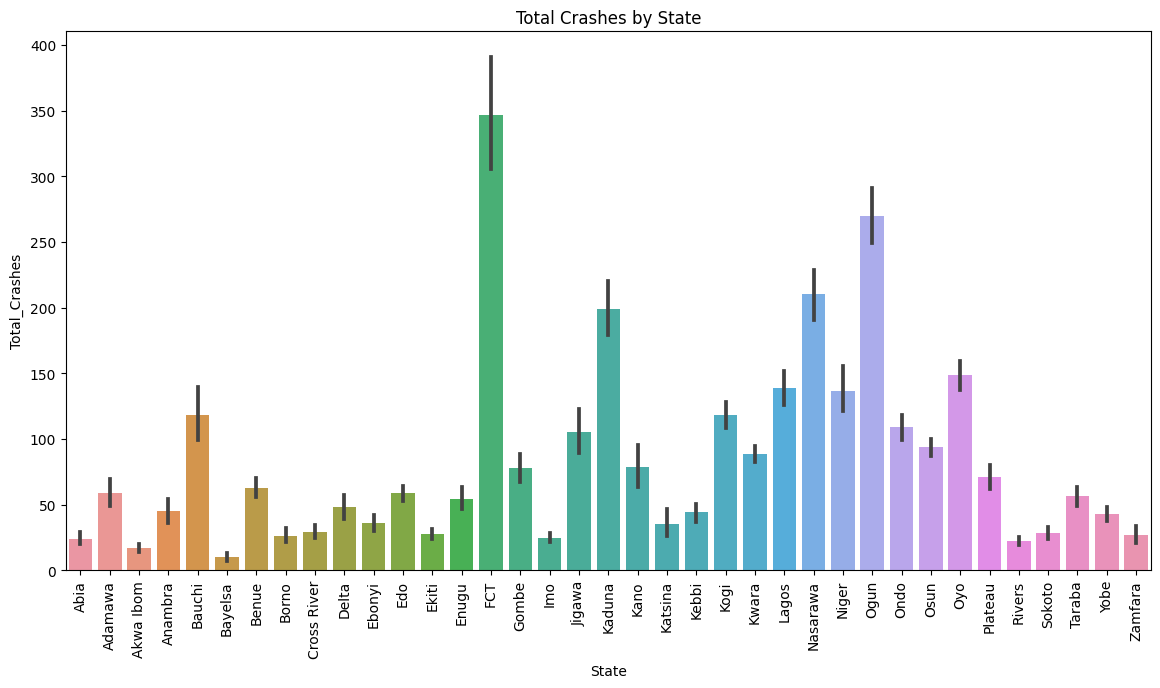

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of Total Crashes by State
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Total_Crashes', data=df)
plt.title('Total Crashes by State')
plt.xticks(rotation=90)
plt.show()

**Visualizing the Distribution of Total Vehicles Involved**

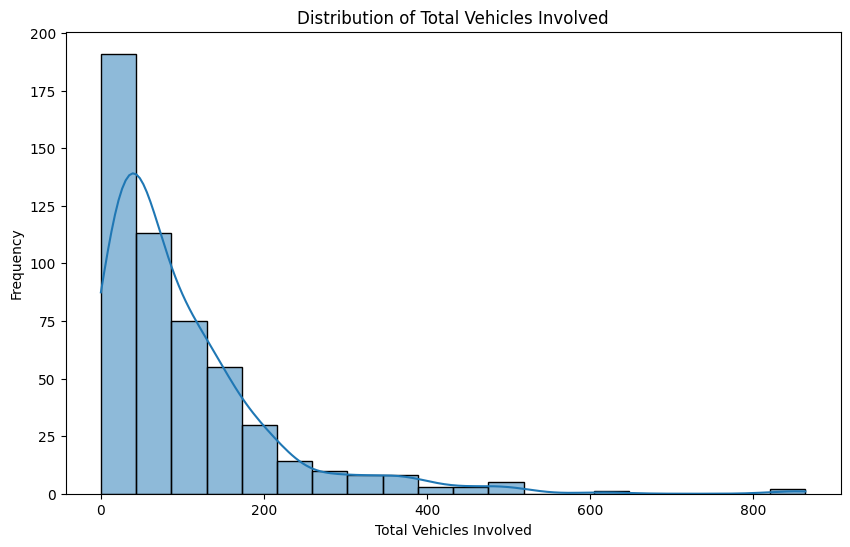

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Vehicles_Involved'], bins=20, kde=True)
plt.title('Distribution of Total Vehicles Involved')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

**Visualizing the Number of Injuries by Quarter**

In [16]:
import plotly.express as px

fig = px.bar(df, x='Quarter', y='Num_Injured', color='State', title='Number of Injuries by Quarter')
fig.show()

**Visualizing Factors Contributing to Crashes (SPV, DAD, PWR, FTQ, Other_Factors)**

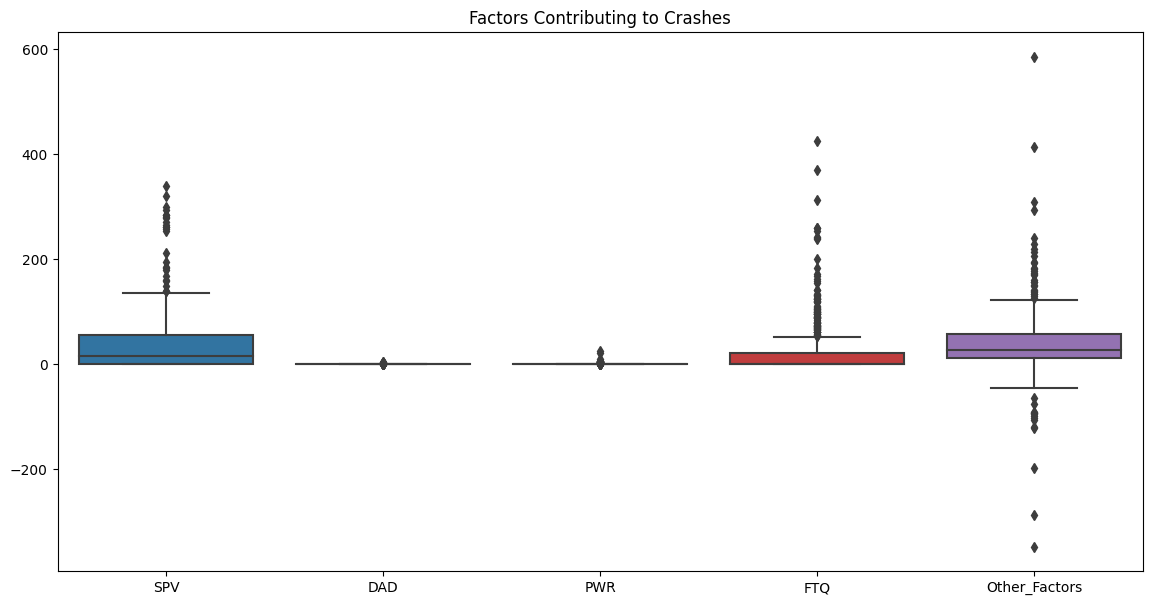

In [17]:
# Box plot of contributing factors
factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']

plt.figure(figsize=(14, 7))
sns.boxplot(data=df[factors])
plt.title('Factors Contributing to Crashes')
plt.show()

**Correlation Heatmap**

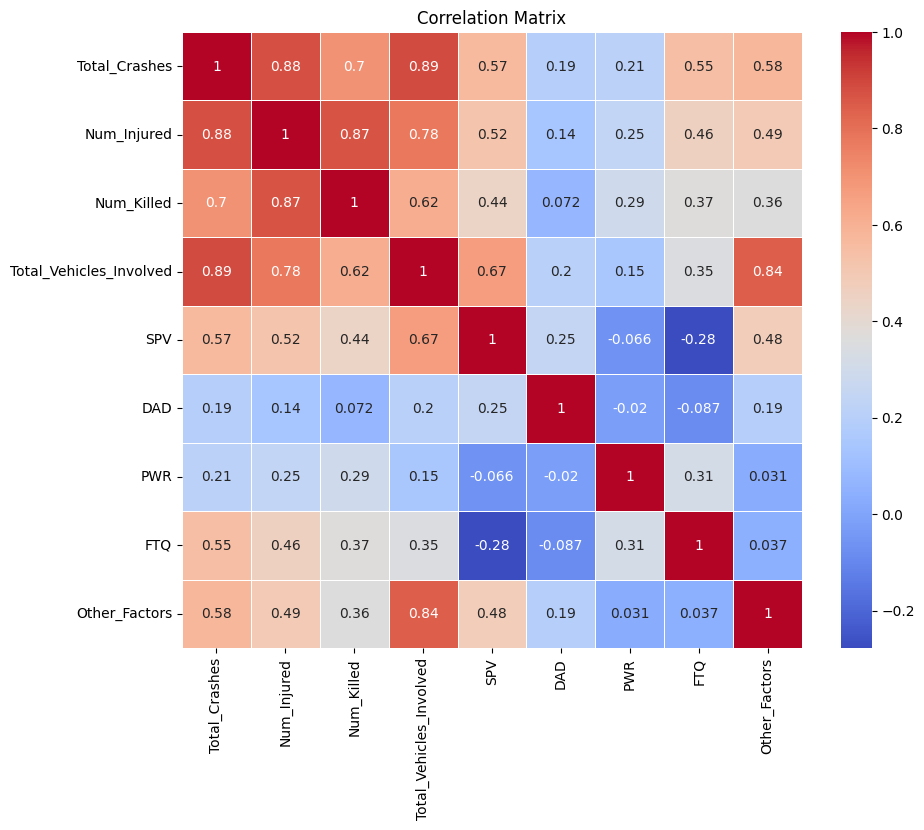

In [18]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Visualizing Total Crashes Over Quarters**

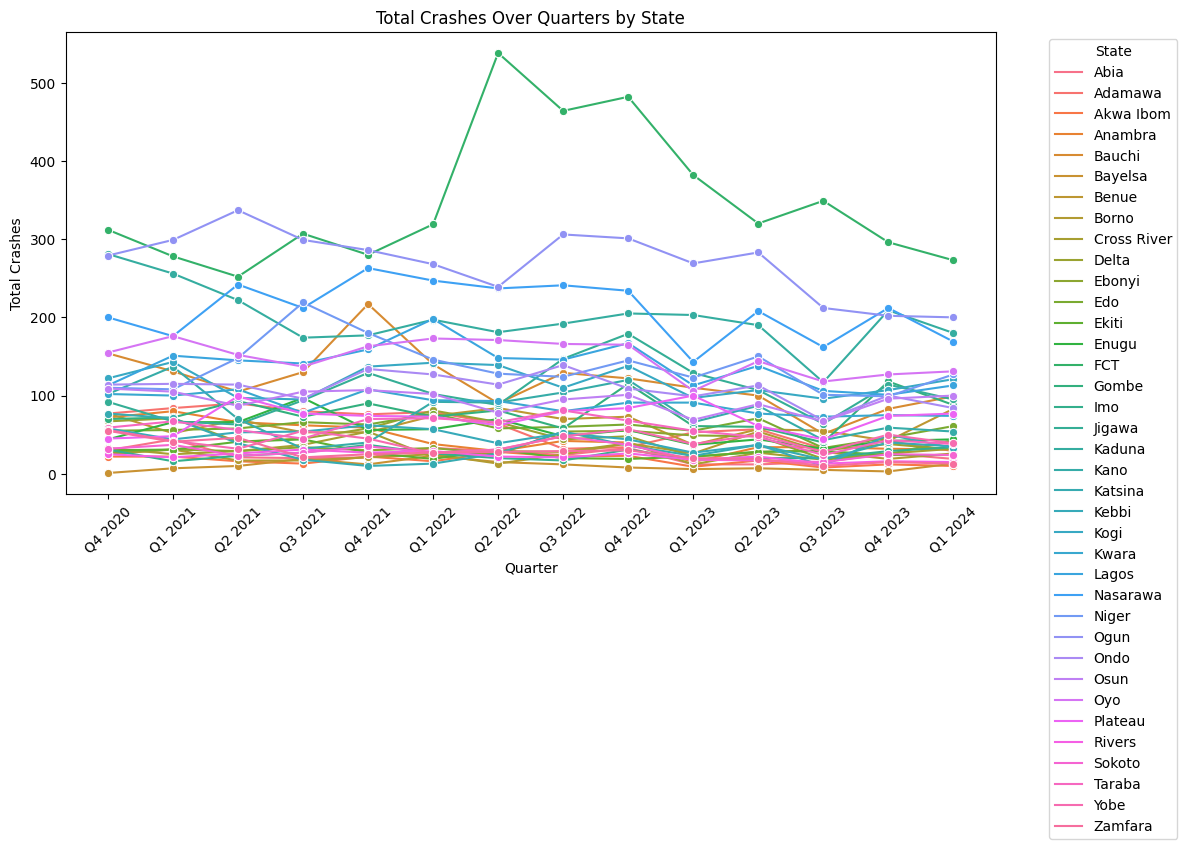

In [19]:
# Line plot to visualize Total Crashes across different Quarters
plt.figure(figsize=(12, 6))
sns.lineplot(x='Quarter', y='Total_Crashes', hue='State', data=df, marker='o')
plt.title('Total Crashes Over Quarters by State')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Relationship Between Total Vehicles Involved and Number of Injuries**

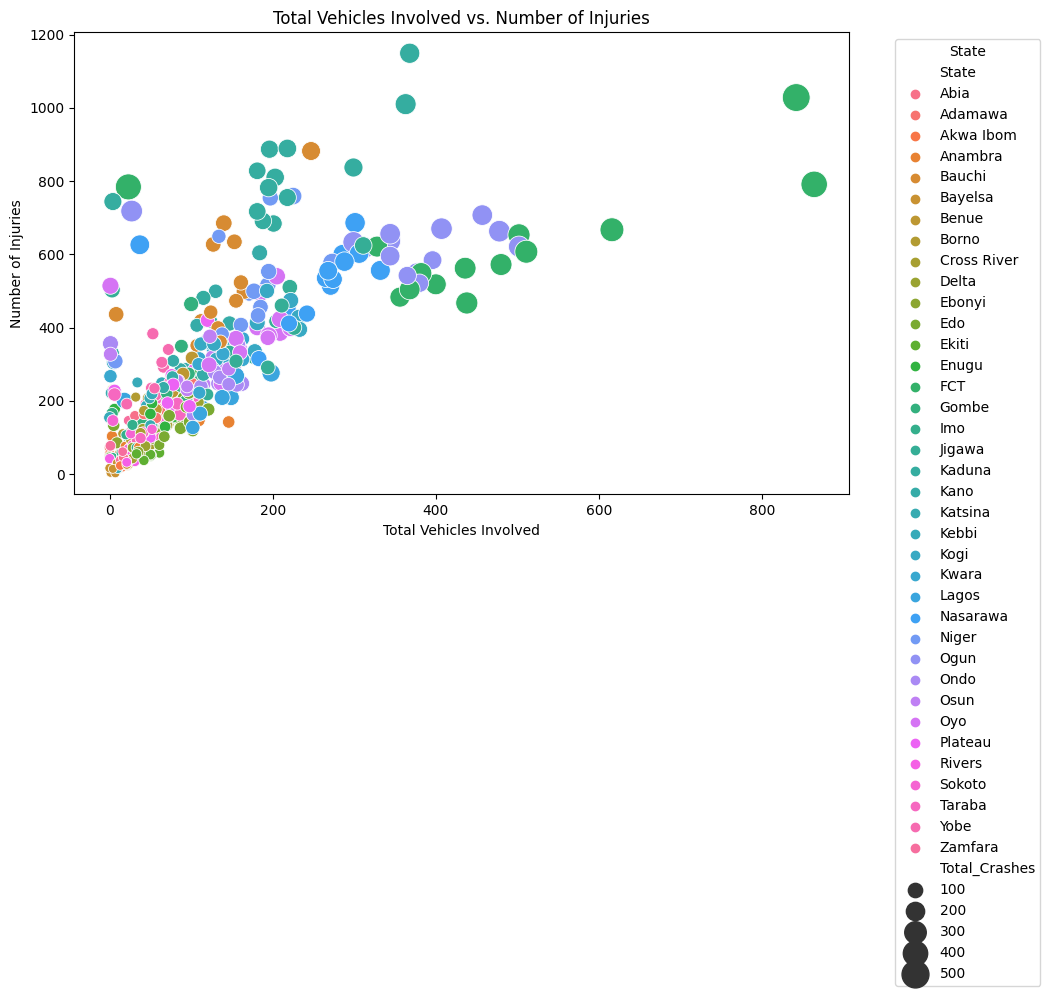

In [20]:
# Scatter plot to visualize the relationship between Total Vehicles Involved and Number of Injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Vehicles_Involved', y='Num_Injured', hue='State', size='Total_Crashes', data=df, sizes=(40, 400))
plt.title('Total Vehicles Involved vs. Number of Injuries')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Number of Injuries')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Proportion of Total Crashes by State**

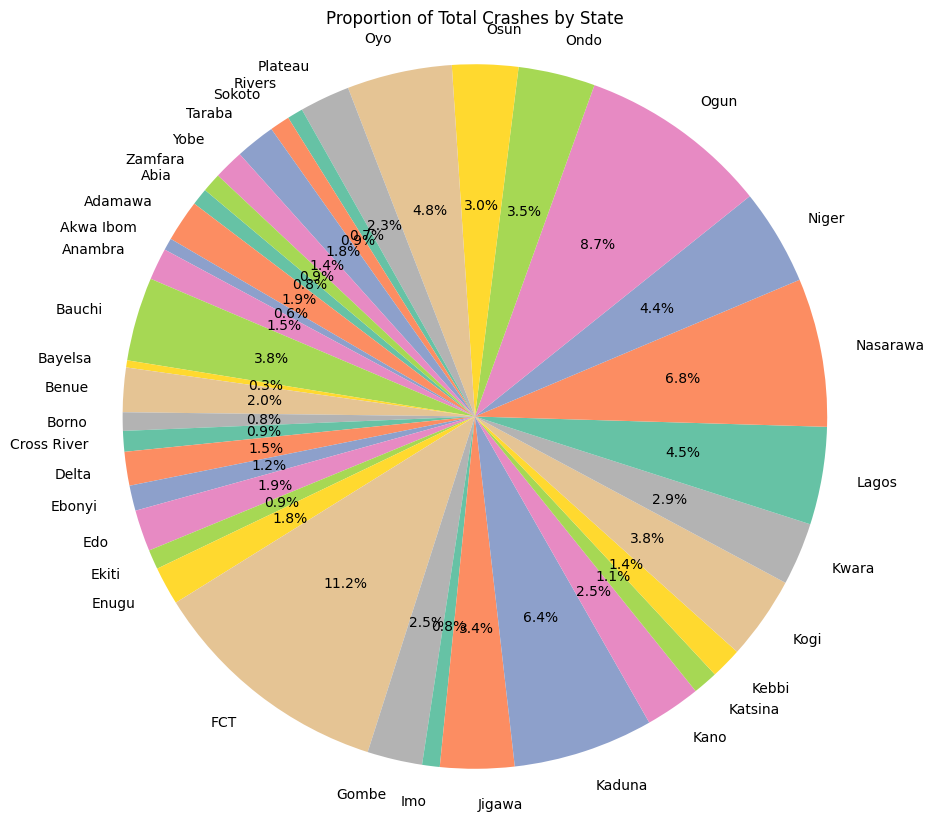

In [21]:
# Pie chart to visualize the proportion of Total Crashes by State
state_crashes = df.groupby('State')['Total_Crashes'].sum()

plt.figure(figsize=(10, 10))
plt.pie(state_crashes, labels=state_crashes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(state_crashes)))
plt.title('Proportion of Total Crashes by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Average Number of Injuries by State**

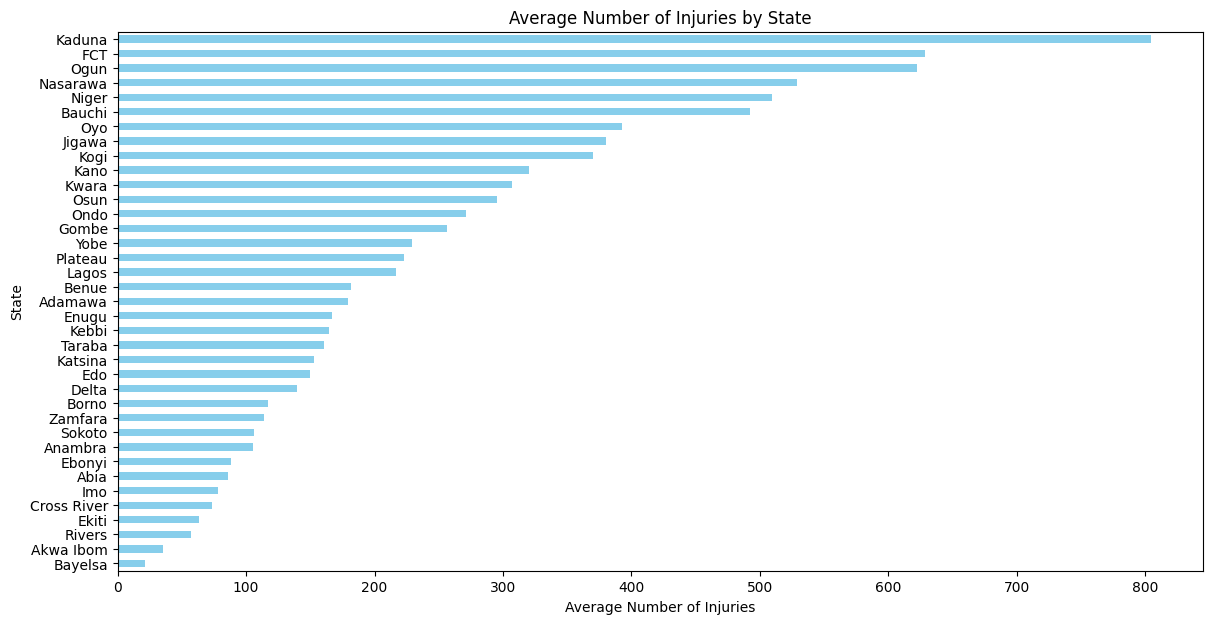

In [22]:
# Bar chart to visualize the average number of injuries by state
avg_injuries_by_state = df.groupby('State')['Num_Injured'].mean().sort_values()

plt.figure(figsize=(14, 7))
avg_injuries_by_state.plot(kind='barh', color='skyblue')
plt.title('Average Number of Injuries by State')
plt.xlabel('Average Number of Injuries')
plt.ylabel('State')
plt.show()

**Frequency of Crashes by State and Quarter**

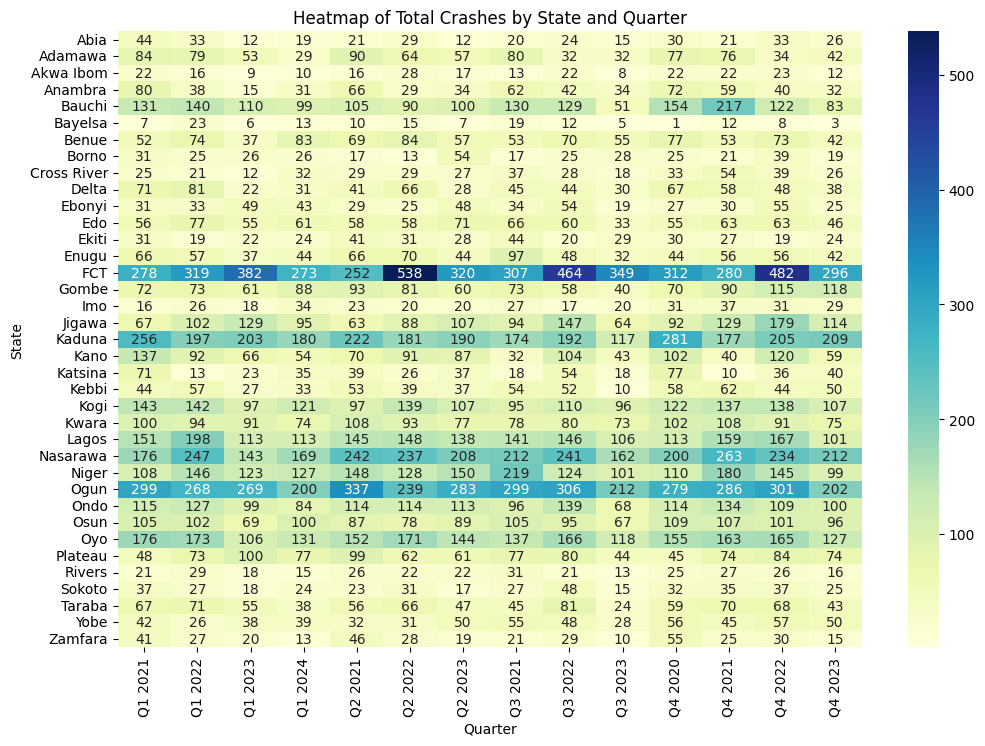

In [23]:
# Pivot table to create a heatmap of crashes by State and Quarter
pivot_table = df.pivot_table(values='Total_Crashes', index='State', columns='Quarter', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Total Crashes by State and Quarter')
plt.xlabel('Quarter')
plt.ylabel('State')
plt.show()

**Exploring Relationships Among Multiple Numeric Features**

<Figure size 1200x1200 with 0 Axes>

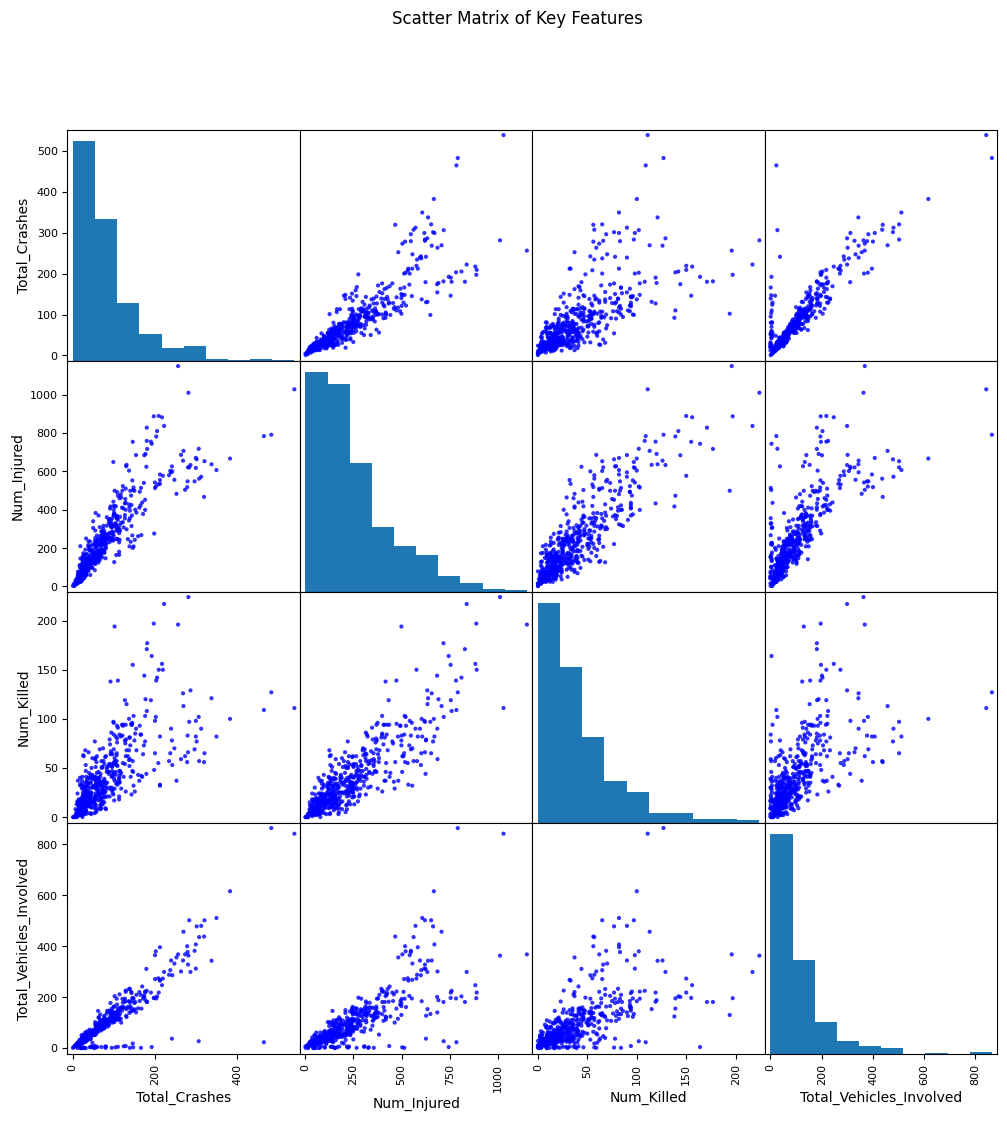

In [24]:
from pandas.plotting import scatter_matrix

# Scatter matrix to explore relationships among multiple numeric features
numeric_columns = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved']

plt.figure(figsize=(12, 12))
scatter_matrix(df[numeric_columns], alpha=0.8, figsize=(12, 12), diagonal='hist', color='blue')
plt.suptitle('Scatter Matrix of Key Features')
plt.show()

**Factors Contributing to Road Crashes (SPV, DAD, PWR, FTQ)**

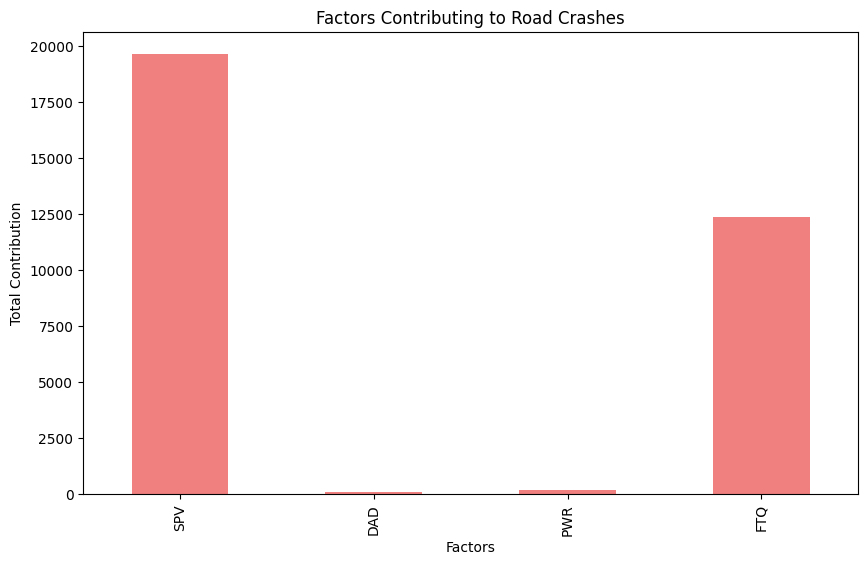

In [25]:
# Aggregating factors contributing to crashes
factor_sums = df[['SPV', 'DAD', 'PWR', 'FTQ']].sum()

plt.figure(figsize=(10, 6))
factor_sums.plot(kind='bar', color='lightcoral')
plt.title('Factors Contributing to Road Crashes')
plt.xlabel('Factors')
plt.ylabel('Total Contribution')
plt.show()

**Breakdown of Injuries and Fatalities by State**

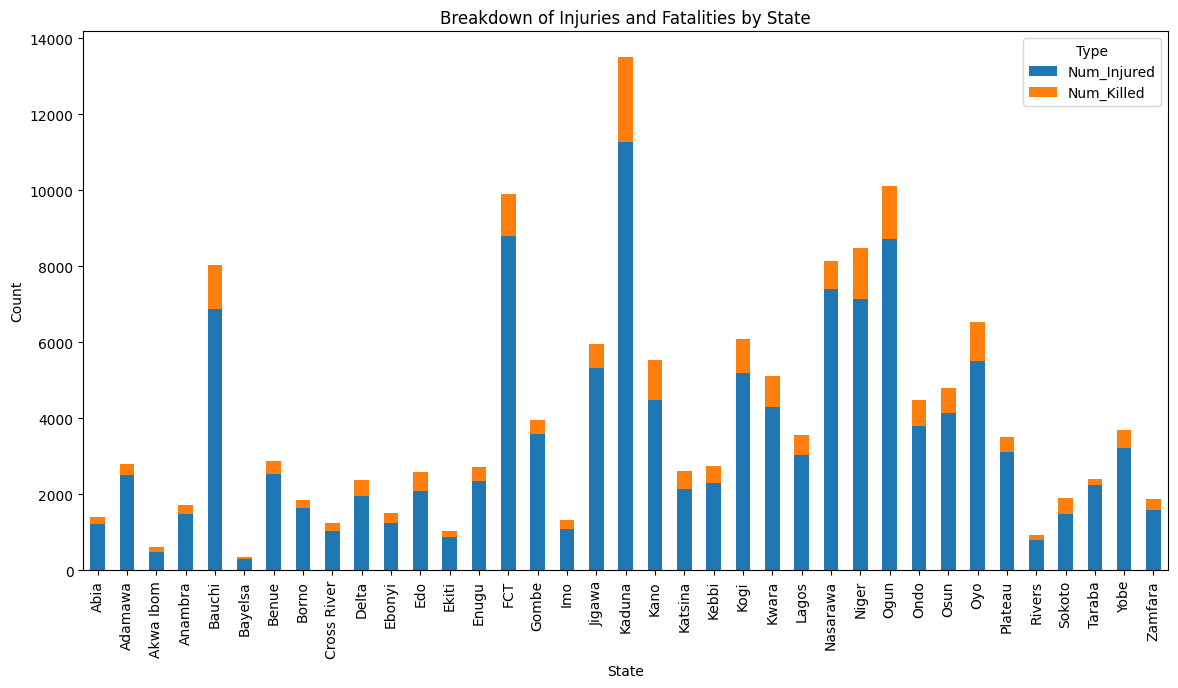

In [26]:
# Stacked bar chart for injuries and fatalities by state
injuries_fatalities = df.groupby('State')[['Num_Injured', 'Num_Killed']].sum()

injuries_fatalities.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])
plt.title('Breakdown of Injuries and Fatalities by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

**Trends in Crashes Over Quarters**

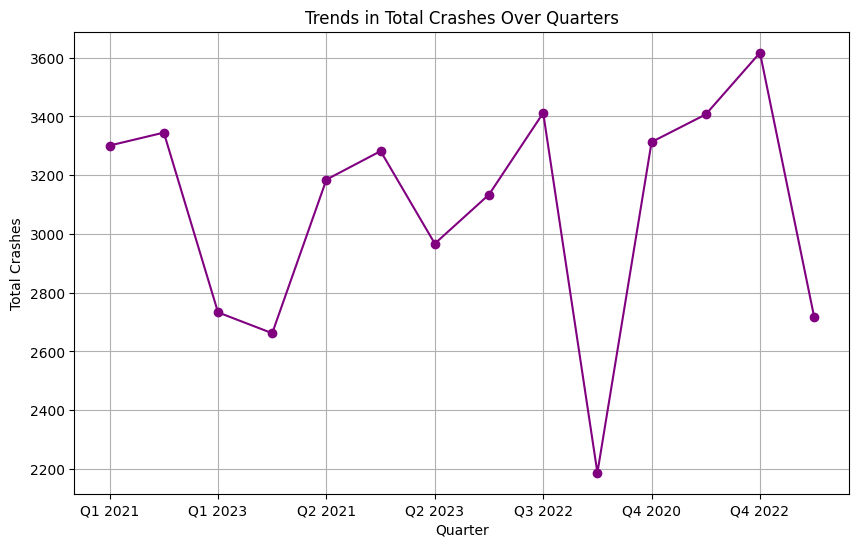

In [27]:
# Line chart for trends in crashes over quarters
df_grouped_quarter = df.groupby('Quarter')['Total_Crashes'].sum()

plt.figure(figsize=(10, 6))
df_grouped_quarter.plot(kind='line', marker='o', color='purple')
plt.title('Trends in Total Crashes Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.grid(True)
plt.show()

**Crashes by State (If State Codes Represent Regions)**

In [28]:
import plotly.express as px

# Geographical visualization (if State represents a location with latitude/longitude or geo codes)
fig = px.choropleth(df, 
                    locations='State', 
                    locationmode='country names', 
                    color='Total_Crashes', 
                    hover_name='State', 
                    title='Geographical Distribution of Total Crashes by State')

fig.show()

**Pairplot for Deeper Analysis of Numerical Features**

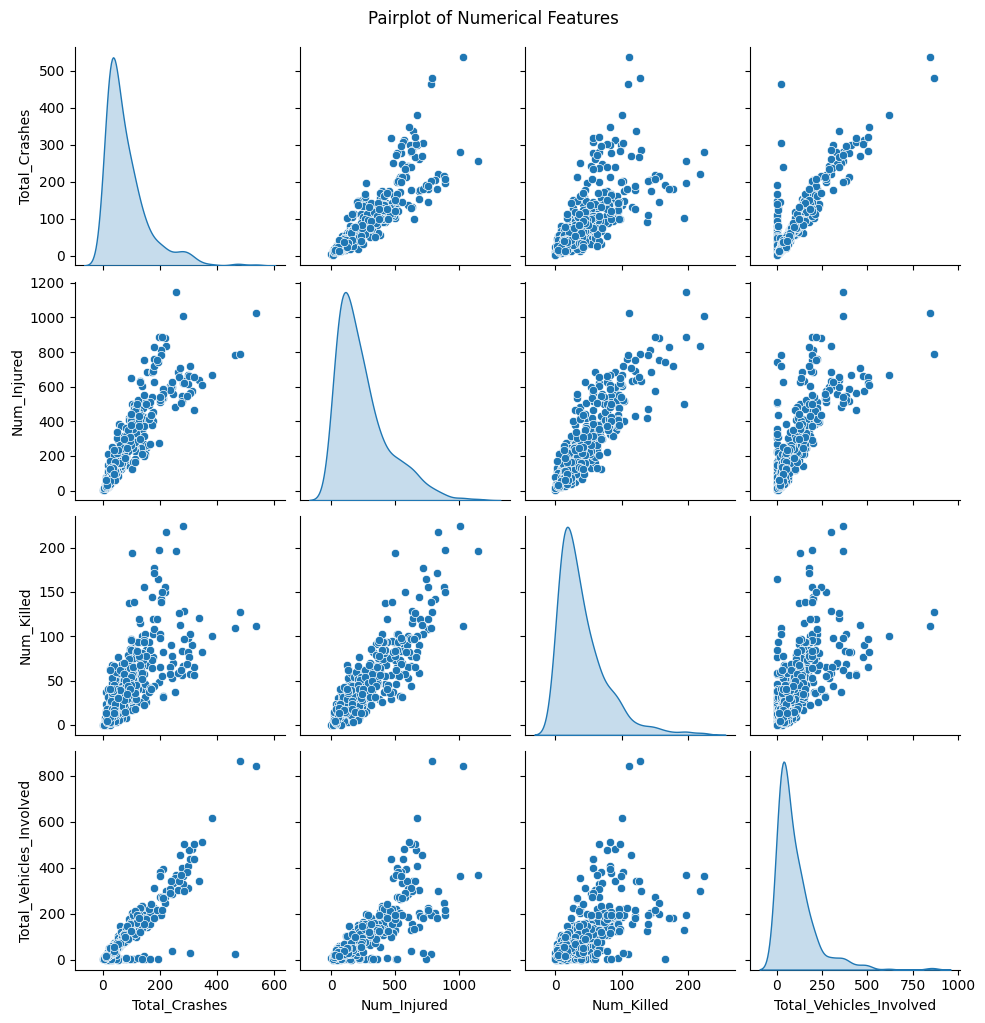

In [29]:
# Pairplot for deeper analysis of relationships between numerical features
sns.pairplot(df[['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

**Hierarchical Visualization of Crashes by State and Quarter**

In [30]:
import plotly.express as px

# Sunburst chart for hierarchical visualization of crashes by State and Quarter
fig = px.sunburst(df, 
                  path=['State', 'Quarter'], 
                  values='Total_Crashes', 
                  color='Num_Killed', 
                  color_continuous_scale='RdYlBu',
                  title='Sunburst Chart of Total Crashes by State and Quarter')

fig.show()

**Distribution of Number of Injuries**

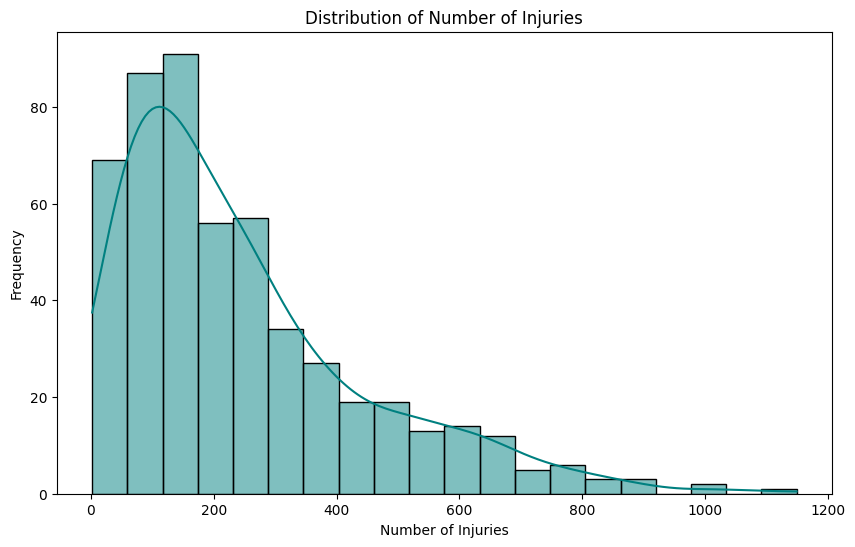

In [31]:
# Histogram to show the distribution of the number of injuries
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_Injured'], bins=20, kde=True, color='teal')
plt.title('Distribution of Number of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.show()

**Proportion of Fatalities by State**

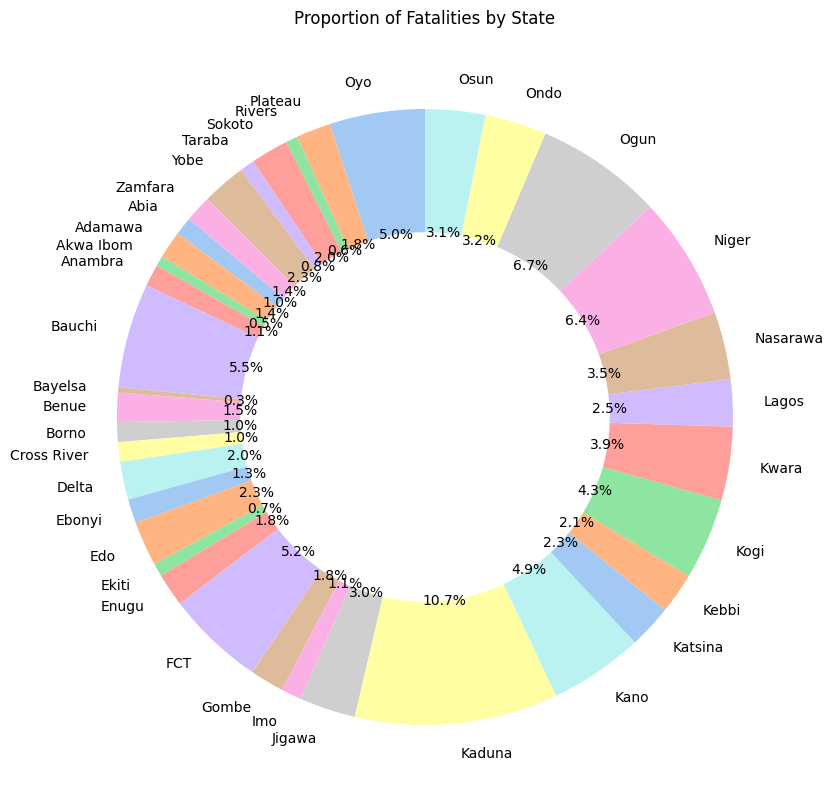

In [32]:
# Donut chart for the proportion of fatalities by state
fatalities_by_state = df.groupby('State')['Num_Killed'].sum()

plt.figure(figsize=(10, 10))
plt.pie(fatalities_by_state, labels=fatalities_by_state.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.4))
plt.title('Proportion of Fatalities by State')
plt.show()


**Total Crashes per State**

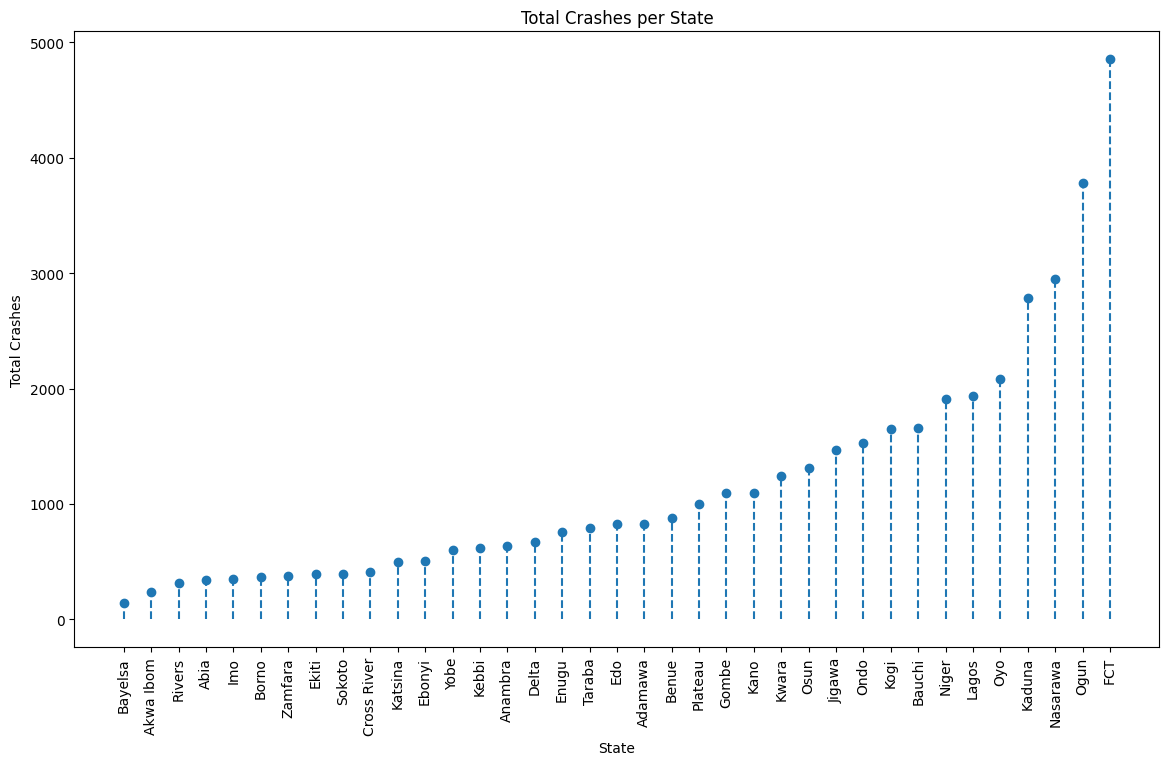

In [33]:
# Lollipop chart for total crashes per state
state_crashes = df.groupby('State')['Total_Crashes'].sum().sort_values()

plt.figure(figsize=(14, 8))
plt.stem(state_crashes.index, state_crashes.values, linefmt='--', markerfmt='o', basefmt=' ')
plt.title('Total Crashes per State')
plt.xlabel('State')
plt.ylabel('Total Crashes')
plt.xticks(rotation=90)
plt.show()

**Number of Vehicles Involved vs. Number of Injuries**

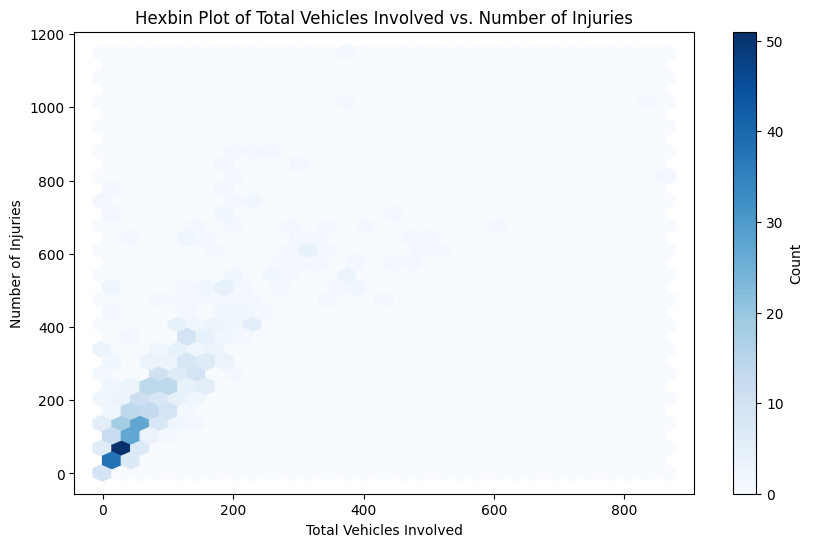

In [34]:
# Hexbin plot for number of vehicles involved vs. number of injuries
plt.figure(figsize=(10, 6))
plt.hexbin(df['Total_Vehicles_Involved'], df['Num_Injured'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Count')
plt.title('Hexbin Plot of Total Vehicles Involved vs. Number of Injuries')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Number of Injuries')
plt.show()

**Crash Severity by State and Quarter**

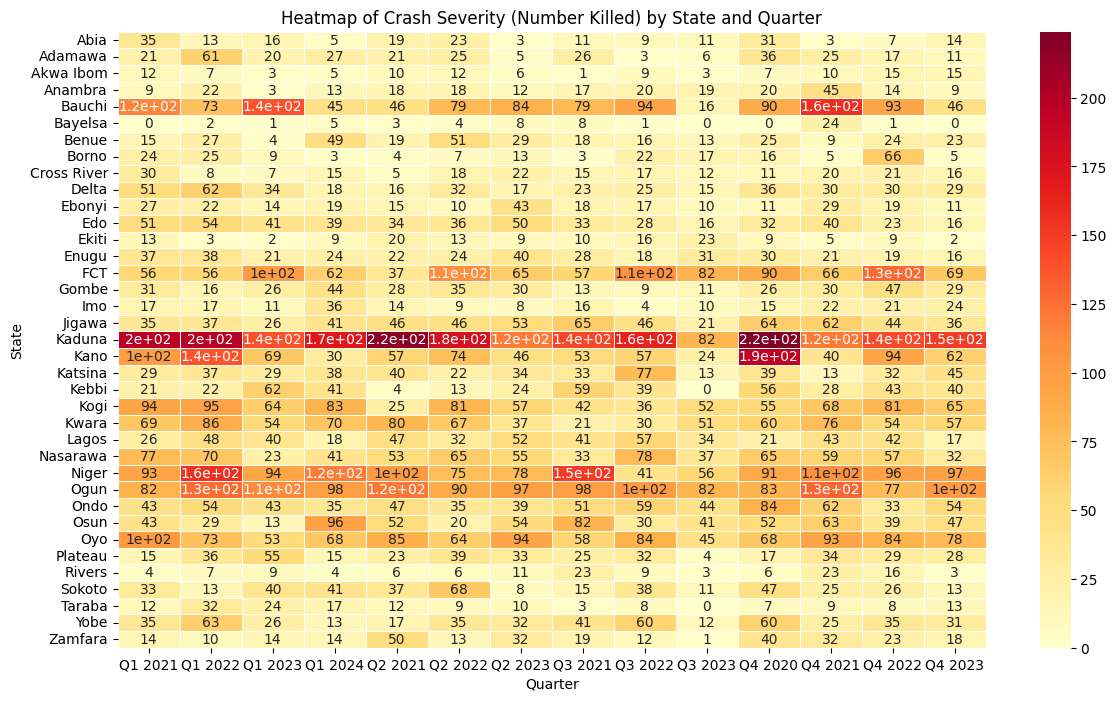

In [35]:
# Heatmap showing crash severity (Number Killed) by State and Quarter
severity_pivot = df.pivot_table(values='Num_Killed', index='State', columns='Quarter', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(severity_pivot, annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap of Crash Severity (Number Killed) by State and Quarter')
plt.xlabel('Quarter')
plt.ylabel('State')
plt.show()

**Parallel Coordinates Plot to analyze the relationship between multiple features**

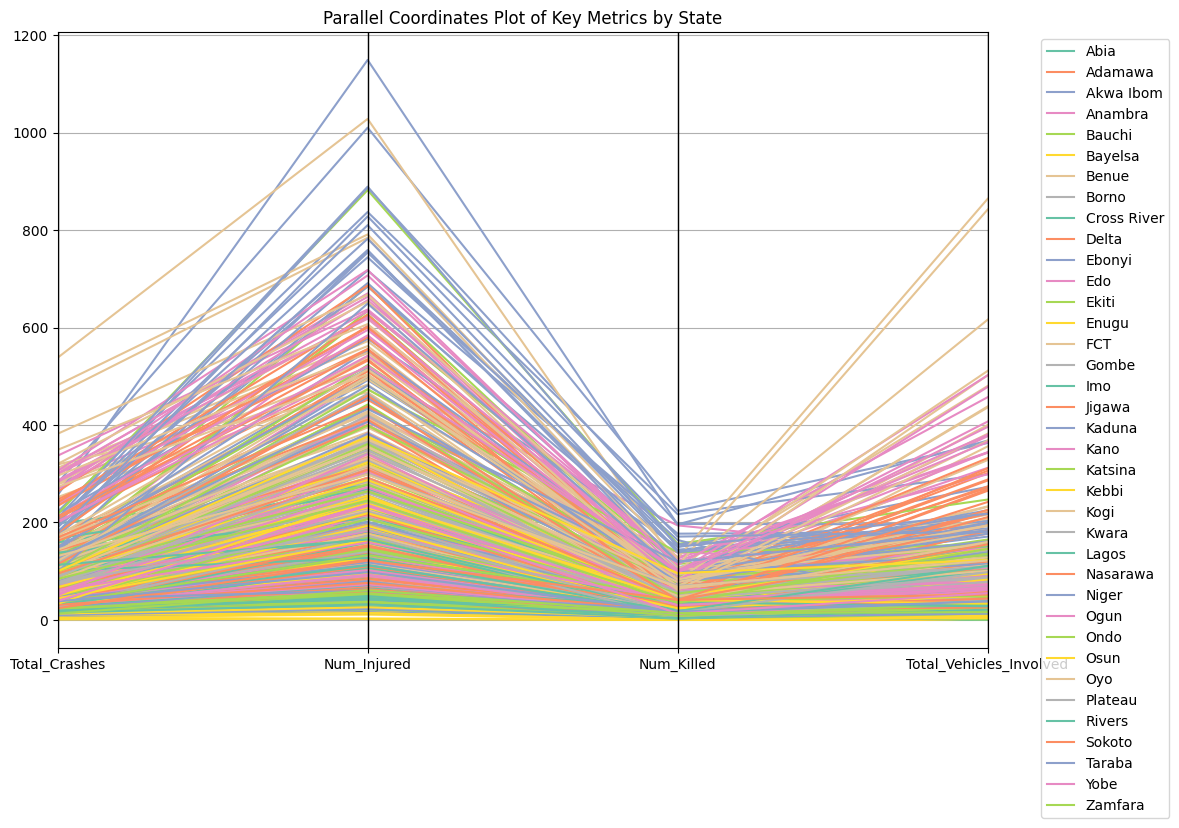

In [36]:
from pandas.plotting import parallel_coordinates

# Parallel Coordinates Plot to analyze the relationship between multiple features
plt.figure(figsize=(12, 8))
parallel_coordinates(df, 'State', cols=['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved'], color=sns.color_palette("Set2"))
plt.title('Parallel Coordinates Plot of Key Metrics by State')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Distribution of Crashes Over Quarters for Each State**

In [37]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 1400x2500 with 0 Axes>

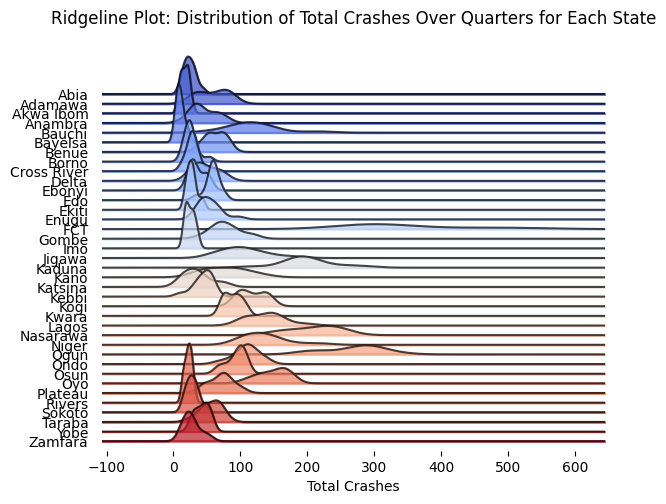

In [38]:
import joypy

# Ridgeline plot to show the distribution of crashes over quarters for each state
plt.figure(figsize=(14, 25))
joypy.joyplot(data=df, by='State', column='Total_Crashes', colormap=sns.color_palette("coolwarm", as_cmap=True), alpha=0.7, linewidth=1.5)
plt.title('Ridgeline Plot: Distribution of Total Crashes Over Quarters for Each State')
plt.xlabel('Total Crashes')
plt.show()